# UNSUPERVISED LEARNING

## K-MEANS CLUSTERING

In [ ]:
- En çok kullanılanları göreceğiz
- K-Means, hierarchical (Dendrogram), PCA
- Clustering çok önemli
- Unlabel data ile çalışılır
- KMeans: Clustering için kullanılır. Müşterileri farklı gruplara ayırıp reklam,indirim vs. stratejisinde kullanılır
- KMeans, distance based olduğu için scale yapmak gerekir

## K_Means Intro

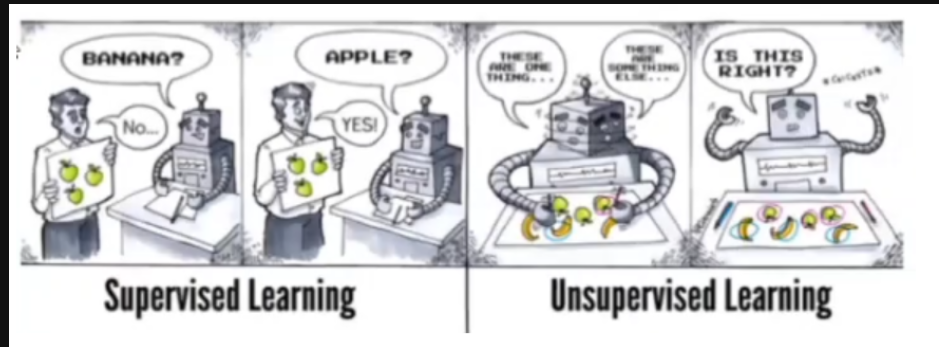

KMeans: benzer özelliklere sahip veri gruplarını kümeler halinde bulmaya yönelik bir algoritma.

En yaygın unsupervised öğrenme algoritmaları arasında şunlar bulunur:

1. K-Means Kümeleme: Bu algoritma, verileri benzerliklerine göre kümelere ayırır. Her küme, küme içindeki veri noktalarının ortalaması olan bir merkez etrafında gruplanır.

2. Hiyerarşik Kümeleme: Veri noktalarını adım adım birleştirerek veya bölererek bir ağaç yapısı (dendrogram) oluşturur. Bu yöntem, veri noktaları arasındaki ilişkilerin daha ayrıntılı bir şekilde incelenmesine olanak tanır.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Yoğunluk tabanlı bir kümeleme yöntemi olan DBSCAN, veri noktalarını yoğunluklarına göre gruplandırır ve aykırı değerleri (outliers) etkili bir şekilde tespit eder.

4. Principal Component Analysis (PCA): Özellik indirgeme (dimensionality reduction) için kullanılan PCA, veri setindeki varyansı maksimize eden yeni bir özellik uzayı oluşturur. Bu, özellikle çok boyutlu veri setlerinde önemlidir.

5. T-Distributed Stochastic Neighbor Embedding (t-SNE): Yüksek boyutlu verileri düşük boyutlu bir uzaya indirgeyerek görselleştirmeyi sağlar. Özellikle karmaşık veri setlerinin görsel analizi için kullanışlıdır.

6. Autoencoders: Sinir ağları temelli bir unsupervised öğrenme modeli olan autoencoders, veriyi sıkıştırıp sonra tekrar çözerek (reconstruct) veri setindeki önemli özellikleri öğrenmeye çalışır.

7. Generative Adversarial Networks (GANs): İki ağ yapısını (bir üretici ve bir ayırıcı) rekabet halinde kullanarak, gerçekçi veri üretimi yapabilen bir yapay zeka modelidir.

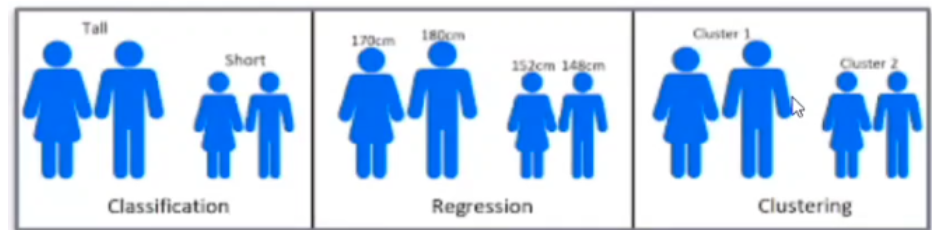

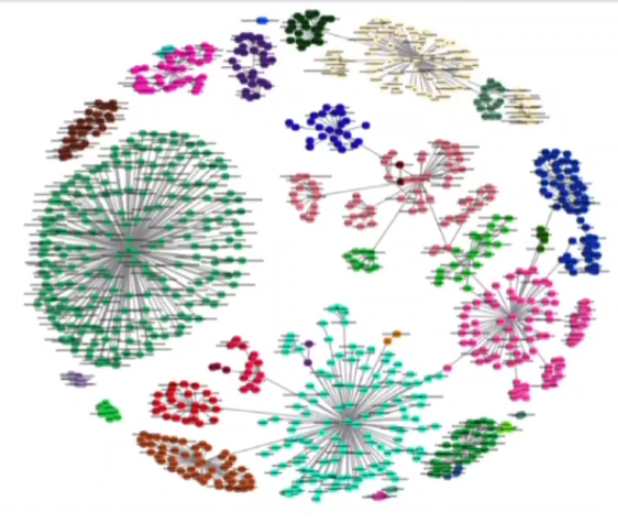

- unsupervised, pattern leri yakalar
- 
Kümelemede domain knowledge çok önemlidir-- 
tecrübeye dayalı kümeleme matematiki sonuçtan daha önemlidir - .
unsupervised da sonuçlar tartışmaya açıktır. kesin değildir..

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Centroid atama için simulasyon sayfası.. --> Randomly --> Gaussian

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

* Irıs data setini çalışacağız
* İris Çiçekleri'nin üç türünün ( Setosa,  Virginica ve  Versicolor) her birinden 50 örnekten oluşur.
* Her numuneden ölçülen dört özellik, santimetre cinsinden çanak yaprağı uzunluğu, çanak yaprağı genişliği, taç yaprağı uzunluğu ve taç yaprağı genişliğidir .

** Unsupervised learningde model eğitim yapmaz. VErilen data setinden benzer pattern'leri kullanarak clustering yapar. 

In [2]:
df = pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

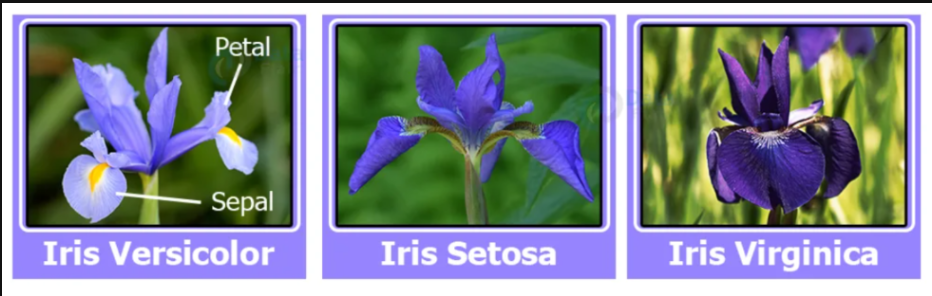

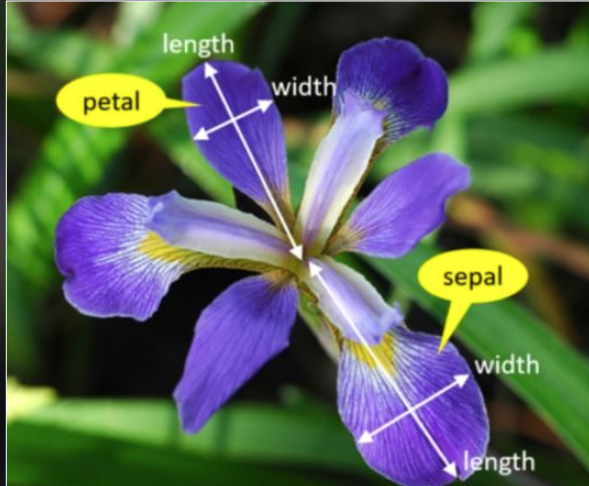

Sepal Length (Çanak Yaprağı Uzunluğu): Çanak yaprağının uzunluğunu santimetre cinsinden gösterir.

Sepal Width (Çanak Yaprağı Genişliği): Çanak yaprağının genişliğini santimetre cinsinden gösterir.

Petal Length (Taç Yaprağı Uzunluğu): Taç yaprağının uzunluğunu santimetre cinsinden gösterir.

Petal Width (Taç Yaprağı Genişliği): Taç yaprağının genişliğini santimetre cinsinden gösterir.

In [3]:
df.species.value_counts() 

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
df.info()

# null value yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

data setindeki tüm değerler cm cinsinden verilmiş. 

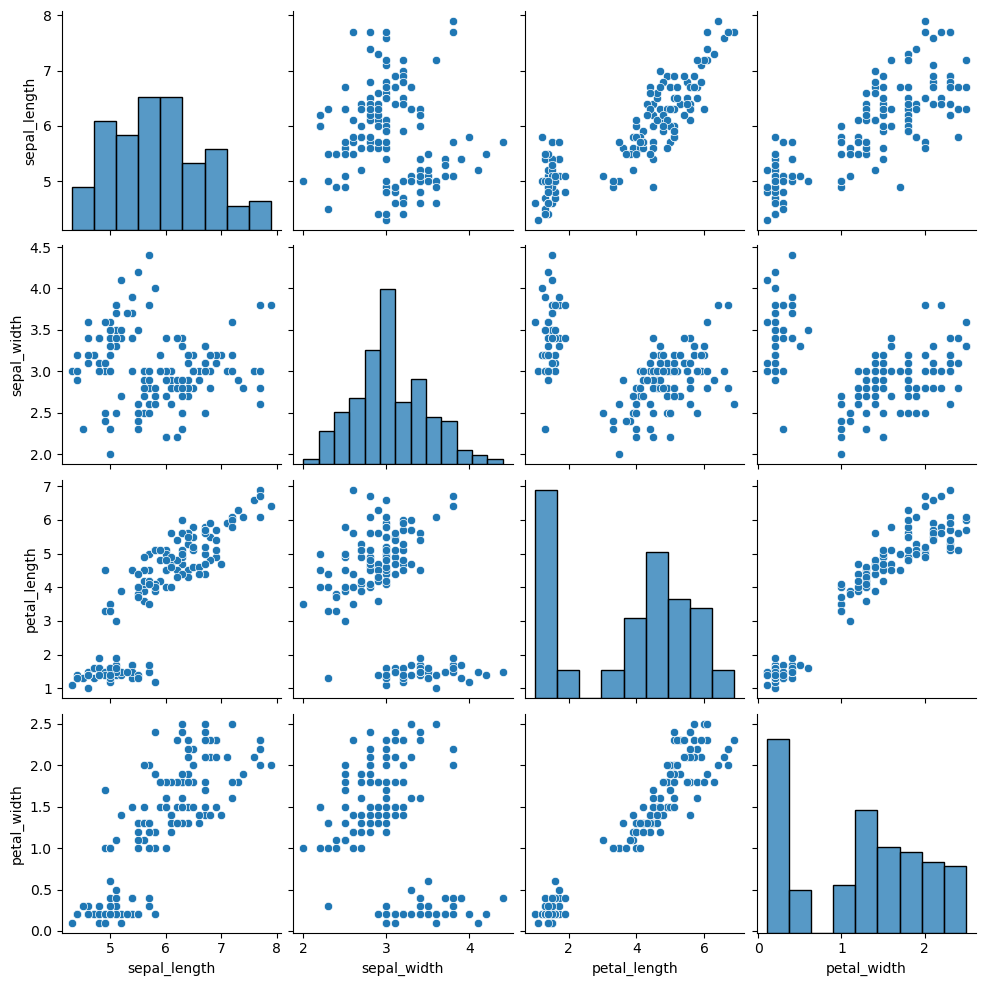

In [7]:
sns.pairplot(df)
plt.show()

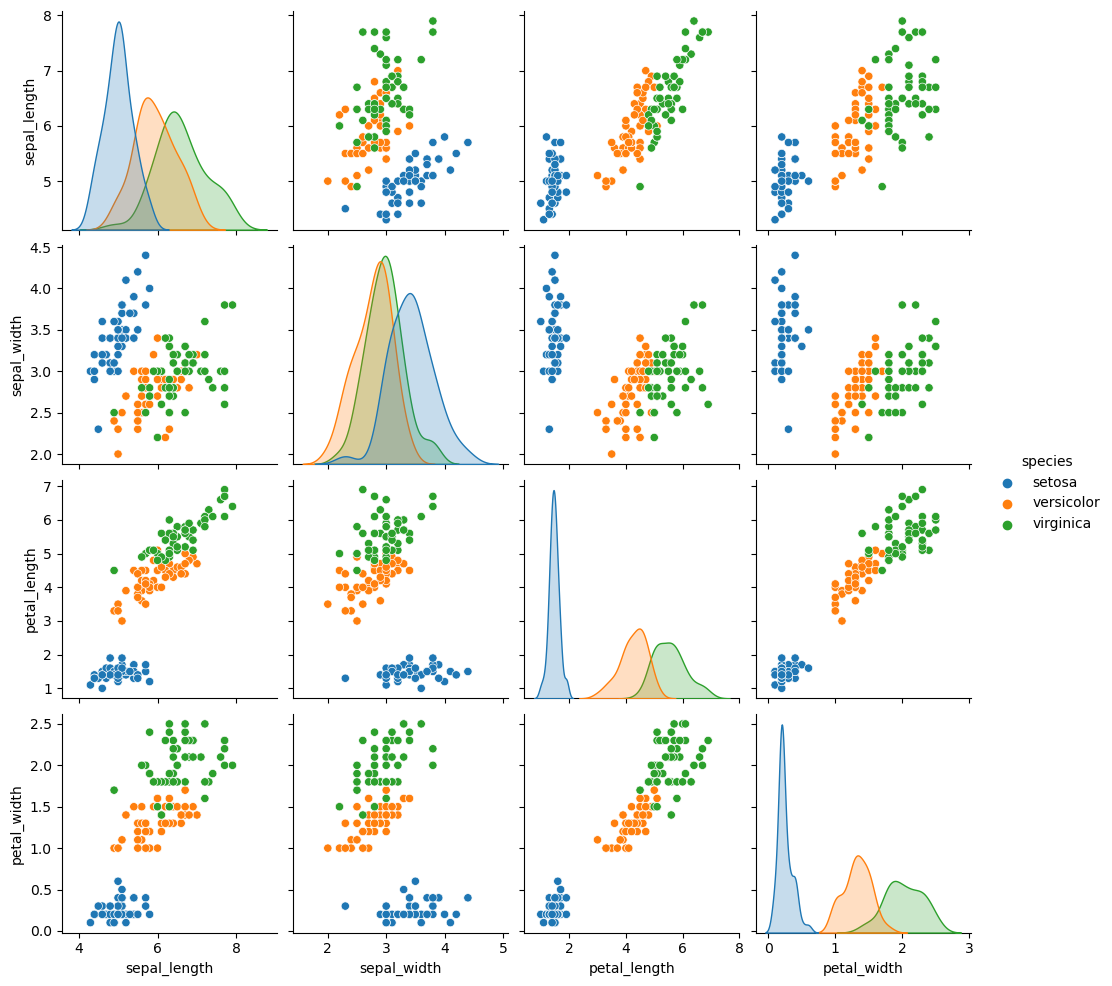

In [8]:
sns.pairplot(data=df, hue="species")
plt.show()

1. Setosa Türü Ayrımı: Setosa türü diğerlerinden belirgin bir şekilde ayrılıyor. Özellikle petal length ve petal width özelliklerinde bu tür, Versicolor ve Virginica'ya göre daha küçük değerlere sahip. Bu, bu özelliklerin Setosa türünü diğerlerinden ayırmak için iyi birer gösterge olduğunu belirtir.

2. Versicolor ve Virginica Karşılaştırması: Versicolor ve Virginica türleri birbirine daha yakın, ancak yine de belirli özelliklerde farklılıklar gözlemlenebilir. Örneğin, petal length ve petal width değerlerinde Virginica, genellikle Versicolor'dan daha büyük değerlere sahiptir.

## Scaling Data

K means algoritmasında mutlaka scale gerekir. Scale edilmiş datayı tekrar scale yapmak uygun olmaz K-means algoritması, verilerin ölçeklenmesine duyarlıdır çünkü öklidyen mesafeye dayanır. Bu nedenle, Feature'ların değer aralıkları birbirinden farklıysa, ölçeklendirme genellikle algoritmanın daha iyi sonuçlar vermesine yardımcı olur. K-Means algoritmasında verilerin ölçeklendirilmesi (scaling) önemlidir. K-Means, özellikler arasındaki uzaklıkları kullanarak kümeleri belirler. Eğer farklı özellikler farklı ölçeklerde ise (örneğin, bir özellik milyonlarla ifade edilirken diğeri 0 ile 1 arasında değişiyorsa), algoritma yanıltıcı sonuçlar verebilir. Özellikler arasındaki bu ölçek farklılıkları, K-Means'ın kümeleme sürecini bozabilir.

Bu yüzden, ölçeklendirme yapmanın veri kümeniz için uygun olup olmadığını belirlemek için her iki durumu (ölçekli ve ölçeksiz) denemeniz önerilir. Elde edilen kümelerin kalitesini ve algoritmanın performansını değerlendirerek hangi yöntemin daha iyi çalıştığına karar vermelisiniz.

In [ ]:
# Eğer Scale yapsaydık alttaki gibi olabilirdi: 

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 

# Iris_scaled = scaler.fit_transform(Iris)   # fit_transform

NOT: bu NB' da scale yapılmadan devam edildi. Çünkü scale yapılarak elde edi,len sonuçların daha kötü olduğu izlendi. Feature lar cm cinsinden olduğu için boylke bir sonuç alınmış olaiblir

burada train ve test split yapmayacağız. doğrudan X'i oluşturacağız. Target variable olmadığı için datanın hepsini X' atayacağız

## K_Means Clustering

KMeans'de işlem sıralaması

- 
Veri ile alakalı ön işlemler (missing, value, outlier v
  s- )
Hopkins Testi (data setim kümelemeye uygun mu değil 
  
mi)
Bu testin sonucu, veri setinin kümelenme için uygun olup olmadığını gösterir. Eğer test sonucu düşük bir değer (genellikle 0.5'in altında) veriyorsa, veri setinde anlamlı kümelerin var olduğuna işaret eder ve kümelenme algoritmalarının kullanımı için uygun bir göstergedir. Yüksek bir değer (0.5'e yakın veya daha yüksek), verilerin rastgele veya düzgün dağıldığını ve belirgin kümelerin olmadığını gösteri- r.

Optimum cluster sayısını bulmak. Ya domain knowledge ile bakarım yada alttaki metotları uygularım (Elbow, Silhouette- ...)

Cluster işleminin kalite kontrolü (ARI-Rand Index)

In [ ]:
#  Eksik veri kontrolü için
# missing_values = iris_data.isnull().sum()

# missing_values

In [9]:
Z = df.copy()   # orjinali koruyalım ki sonra tekrar donebilelim

In [10]:
Z.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [11]:
X = Z.drop("species", axis = 1)   # species freature düşürelim

In [12]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [13]:
X.shape

(150, 4)

## Hopkins test

In [ ]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# Choosing The Optimal Number of Clusters

## Elbow metod

## Second Method - Yellowbrick (n_cluster selection)

## Silhouette analysis

## Silhouette Visualizer

## Building the model based on the optimal number of clusters

## Adjust Rand Score

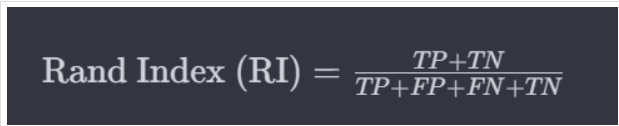

## Visualization Clusters

## Remodeling according to discriminating features